Predict whether to issue Personal Loan or not using Logistic Regression    

5000 records and 14 fields

In [50]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("UnivBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
print(list(df.columns))

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [5]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
for col in df.columns:
    if df[col].dtypes=="int64": 
        unique=df[col].nunique() 
        print("'{col}' has '{unique}' unique features".format(col=col,unique=unique))
         
           
        
        
            
        
 

'ID' has '5000' unique features
'Age' has '45' unique features
'Experience' has '47' unique features
'Income' has '162' unique features
'ZIP Code' has '467' unique features
'Family' has '4' unique features
'Education' has '3' unique features
'Mortgage' has '347' unique features
'Personal Loan' has '2' unique features
'Securities Account' has '2' unique features
'CD Account' has '2' unique features
'Online' has '2' unique features
'CreditCard' has '2' unique features


In [8]:
df['CCAvg'].nunique()

108

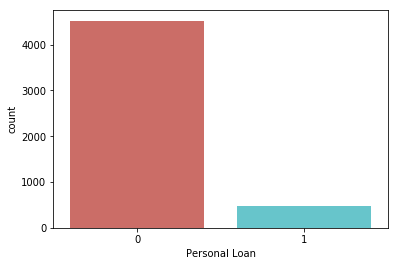

In [9]:
sns.countplot(x='Personal Loan',data=df, palette='hls')
plt.show()


In [10]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [11]:
df.groupby('Personal Loan').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [12]:
df.groupby('Income').mean()

,ID,Age,Experience,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Income,,,,,,,,,,,,,
8,2319.217391,48.391304,23.217391,93772.347826,2.434783,0.429130,2.000000,27.130435,0.000000,0.130435,0.000000,0.521739,0.304348
9,2570.692308,46.230769,21.153846,92796.000000,2.384615,0.384615,2.115385,28.961538,0.000000,0.115385,0.000000,0.576923,0.307692
10,2582.565217,46.565217,21.565217,92425.521739,2.478261,0.481304,1.782609,26.869565,0.000000,0.086957,0.000000,0.652174,0.260870
11,2349.111111,46.074074,20.888889,93461.888889,2.111111,0.402593,1.777778,36.962963,0.000000,0.222222,0.074074,0.333333,0.481481
12,2594.500000,46.700000,22.000000,92938.166667,2.766667,0.522333,1.733333,27.833333,0.000000,0.233333,0.066667,0.500000,0.333333
13,2806.687500,43.593750,18.750000,93374.906250,2.968750,0.574063,1.812500,26.031250,0.000000,0.156250,0.093750,0.718750,0.187500
14,2530.064516,44.161290,19.161290,93264.161290,2.870968,0.558065,1.903226,42.612903,0.000000,0.064516,0.032258,0.677419,0.322581
15,2171.272727,50.090909,24.939394,93239.272727,2.515152,0.475758,2.030303,43.939394,0.000000,0.060606,0.030303,0.484848,0.151515
18,3008.358491,46.603774,21.415094,93333.452830,2.150943,0.569811,2.169811,26.188679,0.000000,0.094340,0.094340,0.622642,0.415094


In [13]:
df.groupby('Mortgage').mean().head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
Mortgage,,,,,,,,,,,,,
0,2518.833622,45.411323,20.169555,73.887348,93137.473137,2.392548,1.951213,1.881282,0.090121,0.104853,0.054015,0.598209,0.295494
75,3137.500000,49.000000,23.500000,56.125000,94239.625000,2.500000,1.150000,1.875000,0.125000,0.125000,0.000000,1.000000,0.000000
76,2530.750000,47.166667,22.083333,49.500000,93624.833333,1.833333,1.183333,1.833333,0.083333,0.250000,0.166667,0.666667,0.500000
77,1774.750000,51.750000,26.250000,53.750000,93466.250000,2.750000,1.150000,1.500000,0.000000,0.000000,0.000000,0.750000,0.250000
78,2492.266667,45.333333,20.600000,39.666667,93191.333333,2.733333,0.720000,2.066667,0.000000,0.333333,0.000000,0.666667,0.000000
79,3253.363636,42.636364,17.818182,57.545455,93427.272727,2.818182,1.539091,1.818182,0.000000,0.090909,0.000000,0.545455,0.272727
80,2900.428571,48.142857,23.428571,40.285714,93662.857143,1.714286,0.857143,2.142857,0.000000,0.000000,0.000000,0.571429,0.142857
81,2377.076923,37.923077,13.307692,45.769231,92929.307692,2.076923,1.548462,1.692308,0.076923,0.076923,0.000000,0.538462,0.230769
82,2713.700000,46.700000,21.800000,65.200000,92927.400000,2.300000,1.720000,2.100000,0.100000,0.200000,0.100000,0.700000,0.500000


In [14]:
df.groupby('Securities Account').mean().head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account,Online,CreditCard
Securities Account,,,,,,,,,,,,,
0,2508.864002,45.340107,20.109424,73.815319,93149.095355,2.388566,1.928937,1.884100,56.686690,0.093792,0.034614,0.594685,0.296338
1,2428.749042,45.323755,20.063218,73.421456,93181.735632,2.463602,2.015153,1.854406,54.886973,0.114943,0.281609,0.614943,0.273946


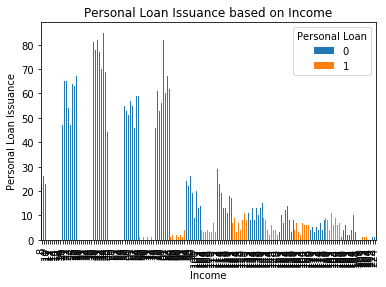

In [15]:
%matplotlib inline
pd.crosstab(df.Income,df["Personal Loan"]).plot(kind='bar')
plt.title('Personal Loan Issuance based on Income')
plt.xlabel('Income')
plt.ylabel('Personal Loan Issuance')
plt.savefig('Loan_Income')

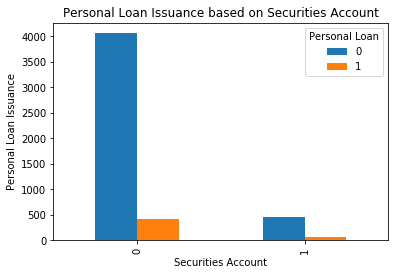

In [19]:
table=pd.crosstab(df["Securities Account"],df["Personal Loan"]).plot(kind='bar')

plt.title('Personal Loan Issuance based on Securities Account')
plt.xlabel('Securities Account')
plt.ylabel('Personal Loan Issuance')
plt.savefig('Loan_Securities Account')

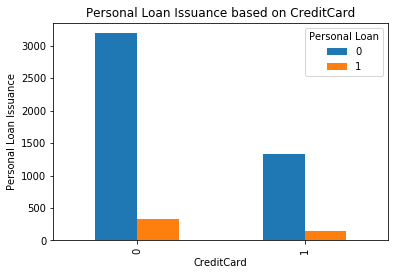

In [20]:
table=pd.crosstab(df["CreditCard"],df["Personal Loan"]).plot(kind='bar')

plt.title('Personal Loan Issuance based on CreditCard')
plt.xlabel('CreditCard')
plt.ylabel('Personal Loan Issuance')
plt.savefig('Loan_CreditCard Account')

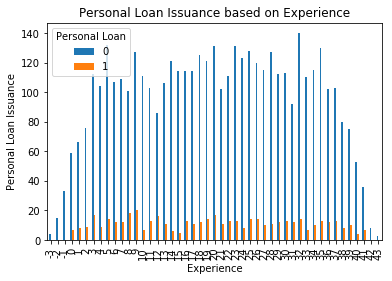

In [21]:
table=pd.crosstab(df["Experience"],df["Personal Loan"]).plot(kind='bar')

plt.title('Personal Loan Issuance based on Experience')
plt.xlabel('Experience')
plt.ylabel('Personal Loan Issuance')
plt.savefig('Loan_Experience')

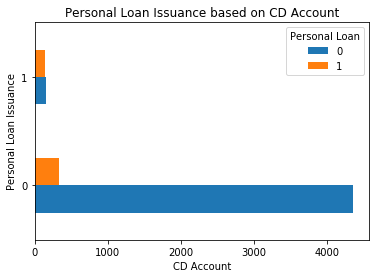

In [22]:
table=pd.crosstab(df["CD Account"],df["Personal Loan"]).plot(kind='barh')

plt.title('Personal Loan Issuance based on CD Account')
plt.xlabel('CD Account')
plt.ylabel('Personal Loan Issuance')
plt.savefig('Loan_CD Account')

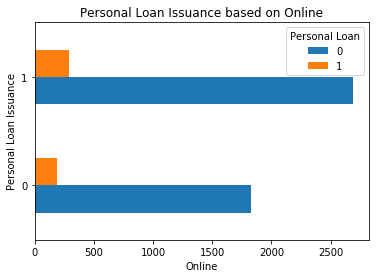

In [23]:
table=pd.crosstab(df.Online,df["Personal Loan"]).plot(kind='barh')

plt.title('Personal Loan Issuance based on Online')
plt.xlabel('Online')
plt.ylabel('Personal Loan Issuance')
plt.savefig('Loan_Online')

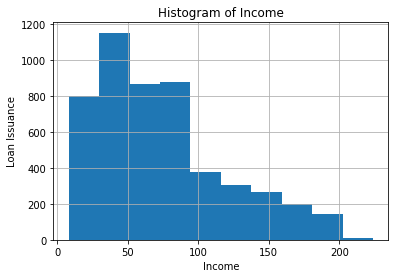

In [26]:
df.Income.hist()
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Loan Issuance')
plt.savefig('hist_Income')

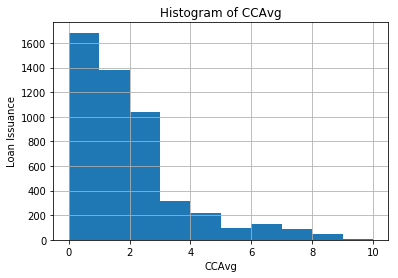

In [27]:
df.CCAvg.hist()
plt.title('Histogram of CCAvg')
plt.xlabel('CCAvg')
plt.ylabel('Loan Issuance')
plt.savefig('hist_CCAvg')

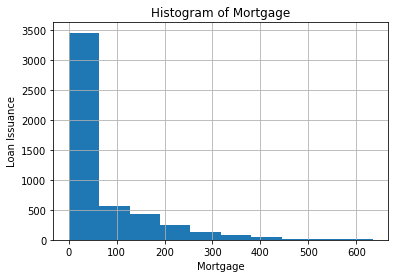

In [28]:
df.Mortgage.hist()
plt.title('Histogram of Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Loan Issuance')
plt.savefig('hist_Mortgage')

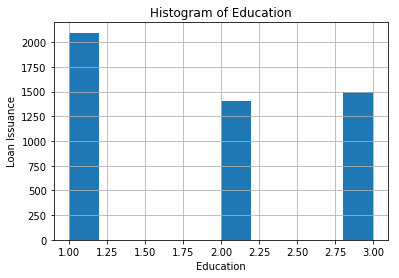

In [29]:
df.Education.hist()
plt.title('Histogram of Education')
plt.xlabel('Education')
plt.ylabel('Loan Issuance')
plt.savefig('hist_Education')

In [38]:
X=df.drop('Personal Loan',axis=1)
print(list(X.columns))

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [32]:
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [36]:
Y=df[["Personal Loan"]]

In [37]:
Y.columns

Index(['Personal Loan'], dtype='object')

In [40]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 10)
rfe = rfe.fit(X,Y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True False  True False
 False]
[1 1 1 1 1 1 1 1 1 2 1 4 3]


C:\Users\muddi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\muddi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\muddi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\muddi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\muddi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will b

In [41]:
Feature_names=[]
for a,b in zip(rfe.ranking_,X):
    if a==1:
        print(a,b)
        Feature_names.append(b)
        
print(Feature_names)  

1 ID
1 Age
1 Experience
1 Income
1 ZIP Code
1 Family
1 CCAvg
1 Education
1 Mortgage
1 CD Account
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account']


In [42]:
cols=['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account']
X=df[cols]Y

In [43]:
X.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'CD Account'],
      dtype='object')

In [44]:
Y.columns

Index(['Personal Loan'], dtype='object')

In [45]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.139220
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4991
Method:                           MLE   Df Model:                            8
Date:                Fri, 10 May 2019   Pseudo R-squ.:                  0.5597
Time:                        20:21:52   Log-Likelihood:                -696.10
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID         -8.475e-05   4.91e-05     -1.725      0.084      -0.000    1.15e-05
Age           -0.5210      0.

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\muddi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\muddi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
Y_pred = logreg.predict(X_test)

In [48]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [51]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.943


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[1338   16]
 [  51   95]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1354
           1       0.86      0.65      0.74       146

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.91      0.82      0.86      1500
weighted avg       0.95      0.96      0.95      1500

